## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [2157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2158]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [2159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [2160]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [2161]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
243.0         1
1525.0        1
2570.0        1
248.0         1
1275.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [2162]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [2163]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [2164]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [2165]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [2166]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [2167]:
# Update null values to 0
df.fillna(0, inplace = True)

In [2168]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [2169]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)
- bathrooms and bedrooms: round

In [2170]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [2171]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [2172]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [2173]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [2174]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [2175]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [2176]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [2177]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [2178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [2179]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [2180]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [2181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [2182]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [2183]:
# cols to round
cols = ['bedrooms', 'bathrooms']

df[cols] = df[cols].round(0)
df[cols]

,bedrooms,bathrooms
0,3,1.0
1,3,2.0
2,2,1.0
3,4,3.0
4,3,2.0
...,...,...
21592,3,2.0
21593,4,2.0
21594,2,1.0
21595,3,2.0


In [2184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


In [2185]:
df['bathrooms'] = df.bathrooms.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

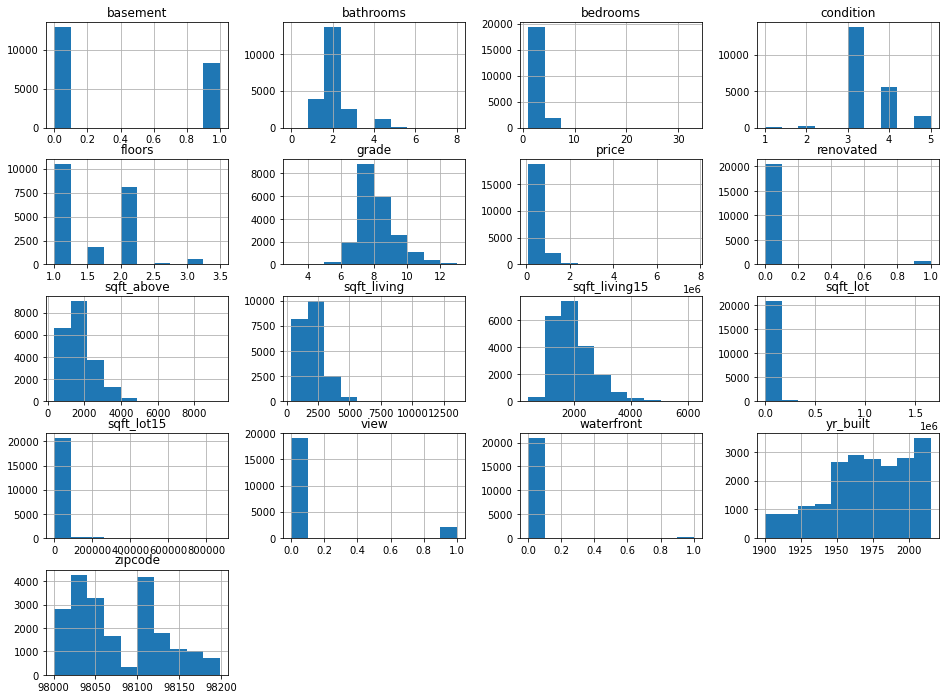

In [2186]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

In [2187]:
# bathrooms
#df['bathrooms'].hist();

In [2188]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

In [2189]:
#df['bathrooms'].value_counts()

In [2190]:
# Set limit to 4
#df = df[df['bathrooms']<=4]

In [2191]:
# bathrooms
#df['bathrooms'].hist();

In [2192]:
# bedrooms
#df['bedrooms'].hist();

In [2193]:
#df['bedrooms'].value_counts()

In [2194]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

In [2195]:
# Set limit to 12
#df = df[df['bedrooms']<=5]

In [2196]:
#df['bedrooms'].hist()

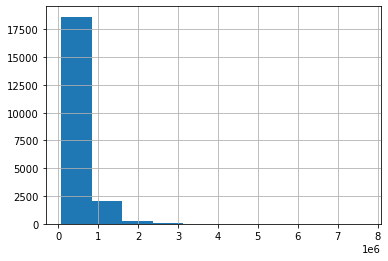

In [2197]:
#price
df.price.hist();

In [2198]:
df.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3581, dtype: int64

In [2199]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [2200]:
# Set limit to 1100000
df = df[df['price']<=1100000]

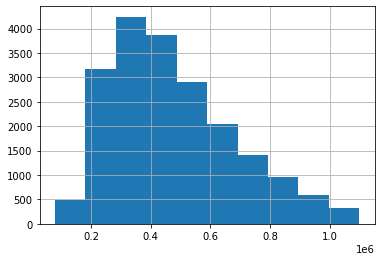

In [2201]:
df.price.hist();

In [2202]:
# features
sqft_feats = ['bathrooms', 'bedrooms','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

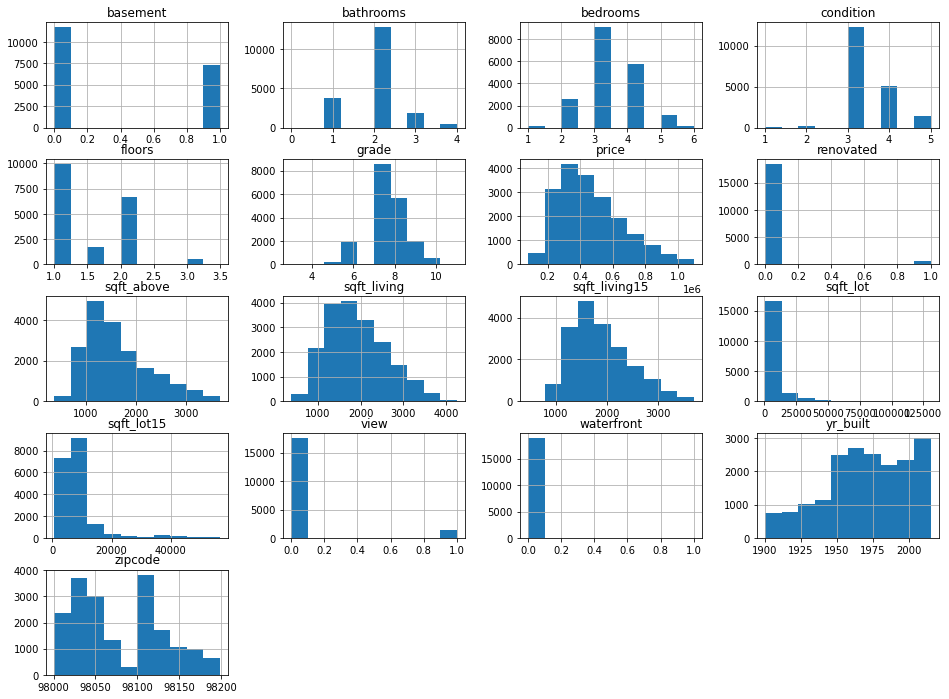

In [2203]:
df.hist(figsize=(16,12));

## Normalize Continuous Features

In [2204]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = N/A
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in log_feats:
    df[var]= np.log(df[var])

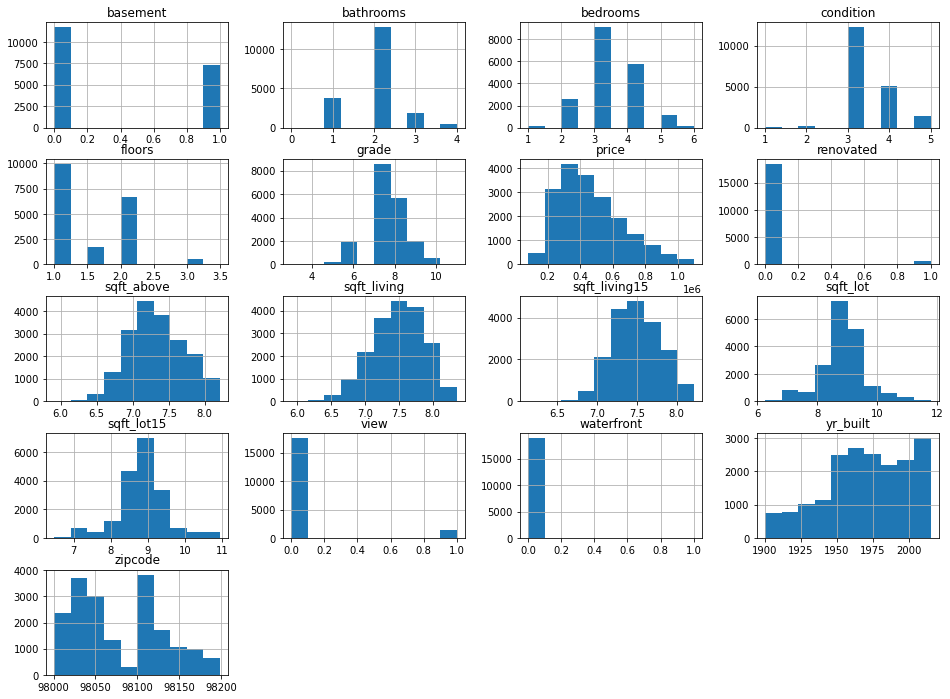

In [2205]:
df.hist(figsize = (16,12));

In [2206]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data moew normal, it will just change the mean and the standard error!

continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

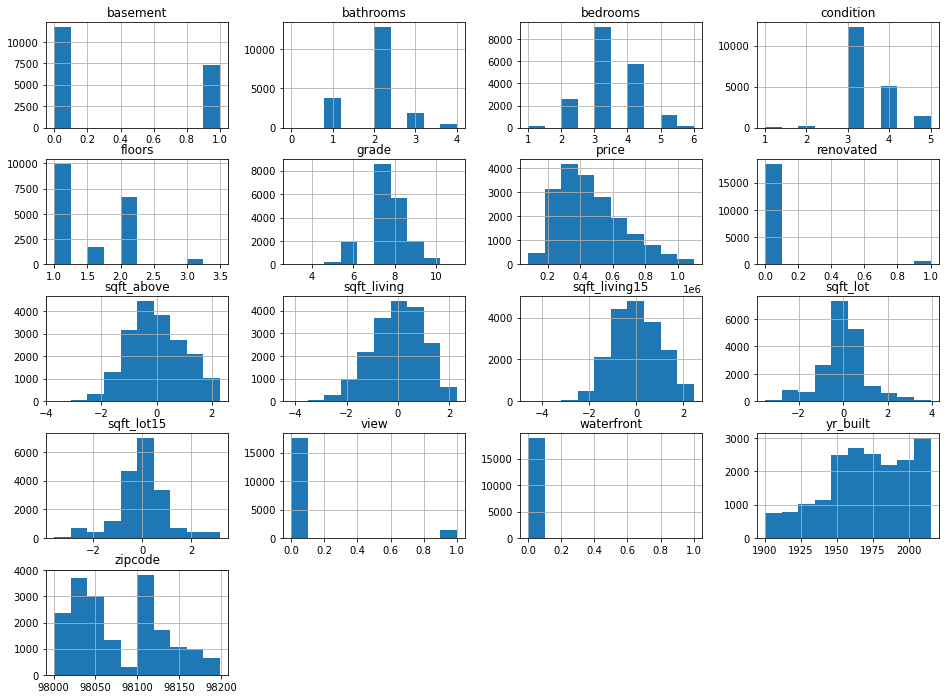

In [2207]:
df.hist(figsize = (16, 12));

# Explore Data

## What are my top zip codes

In [2208]:
df.zipcode.value_counts()

98103    568
98115    543
98052    534
98117    529
98042    513
        ... 
98010     75
98070     64
98148     55
98024     40
98039      6
Name: zipcode, Length: 70, dtype: int64

## Check for linearity

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

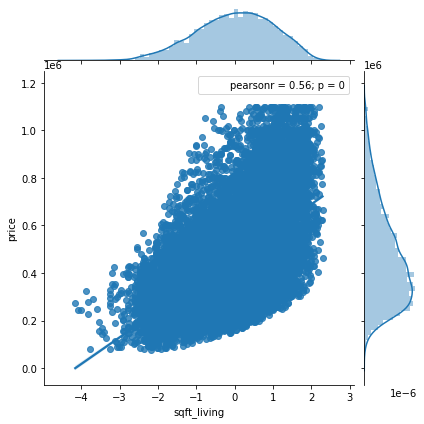

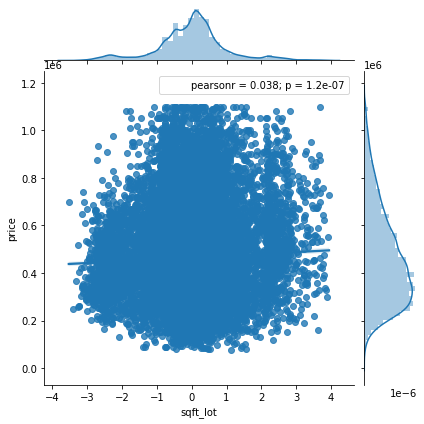

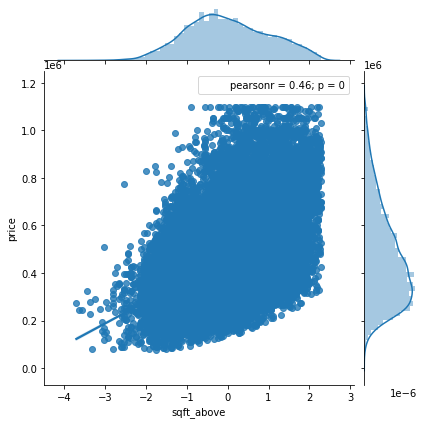

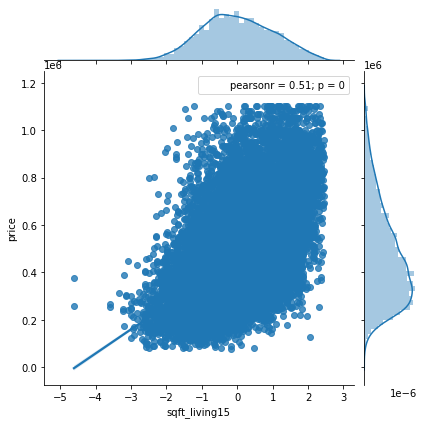

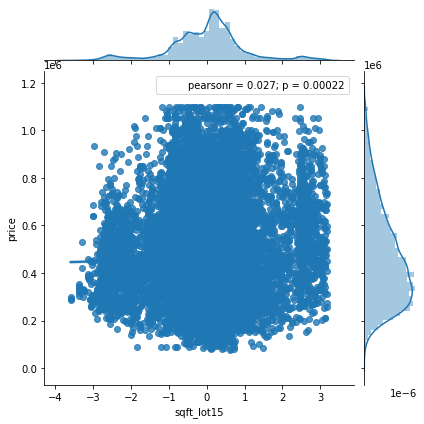

In [2209]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

# Box Plots

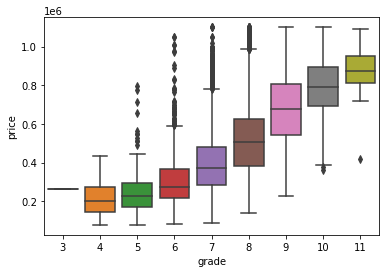

In [2210]:
sns.boxplot(x = df['grade'], y = df['price'])

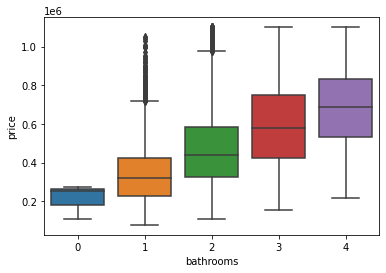

In [2211]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

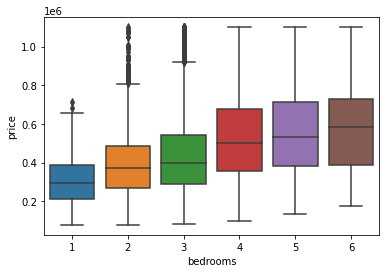

In [2212]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

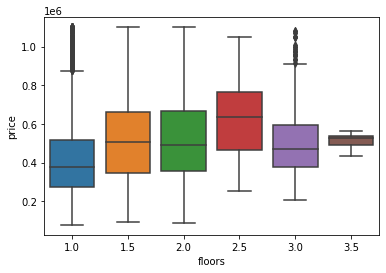

In [2213]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

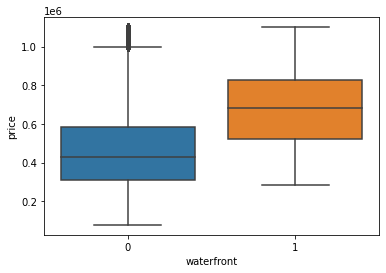

In [2214]:
sns.boxplot(x = df['waterfront'], y = df['price'])

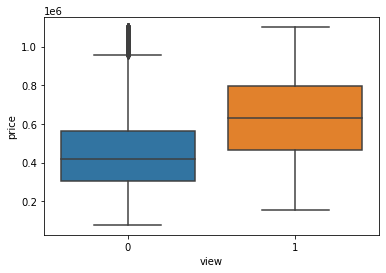

In [2215]:
sns.boxplot(x = df['view'], y = df['price'])

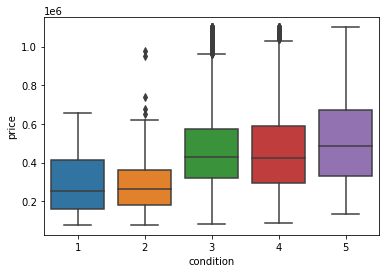

In [2216]:
sns.boxplot(x = df['condition'], y = df['price'])

## Check for multicollinearity

In [2217]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.278099,0.385624,0.561192,0.038471,0.246482,0.048802,0.238946,0.061723,0.593353,0.462929,0.015622,0.002577,0.509797,0.026853,0.091077,0.188037
bedrooms,0.278099,1.000000,0.455097,0.635543,0.216207,0.144307,-0.021742,0.038315,0.031499,0.321669,0.509004,0.165814,-0.159958,0.399141,0.196207,-0.001716,0.153194
bathrooms,0.385624,0.455097,1.000000,0.622160,-0.004188,0.340552,-0.005822,0.107173,-0.050874,0.487697,0.498248,0.392487,-0.133081,0.415254,-0.007138,0.042756,0.231042
sqft_living,0.561192,0.635543,0.622160,1.000000,0.267451,0.324681,-0.002323,0.145878,-0.042334,0.669379,0.829882,0.349850,-0.211814,0.707060,0.246084,0.023079,0.235774
sqft_lot,0.038471,0.216207,-0.004188,0.267451,1.000000,-0.359091,0.050154,0.065152,0.122203,0.065662,0.243020,-0.086880,-0.258164,0.326703,0.909856,0.009262,-0.043635
floors,0.246482,0.144307,0.340552,0.324681,-0.359091,1.000000,-0.004291,-0.030226,-0.275390,0.451208,0.532836,0.508972,-0.061332,0.238216,-0.346081,-0.003421,-0.285677
waterfront,0.048802,-0.021742,-0.005822,-0.002323,0.050154,-0.004291,1.000000,0.167663,0.007011,-0.015500,-0.007541,-0.034443,0.045668,0.011602,0.057686,0.058100,0.009955
view,0.238946,0.038315,0.107173,0.145878,0.065152,-0.030226,0.167663,1.000000,0.040543,0.120534,0.051183,-0.085652,0.122548,0.183210,0.063300,0.048959,0.163350
condition,0.061723,0.031499,-0.050874,-0.042334,0.122203,-0.275390,0.007011,0.040543,1.000000,-0.162162,-0.152611,-0.351031,-0.010897,-0.095948,0.127833,-0.054688,0.127981
grade,0.593353,0.321669,0.487697,0.669379,0.065662,0.451208,-0.015500,0.120534,-0.162162,1.000000,0.677362,0.484500,-0.177750,0.624838,0.079297,-0.008684,0.019003


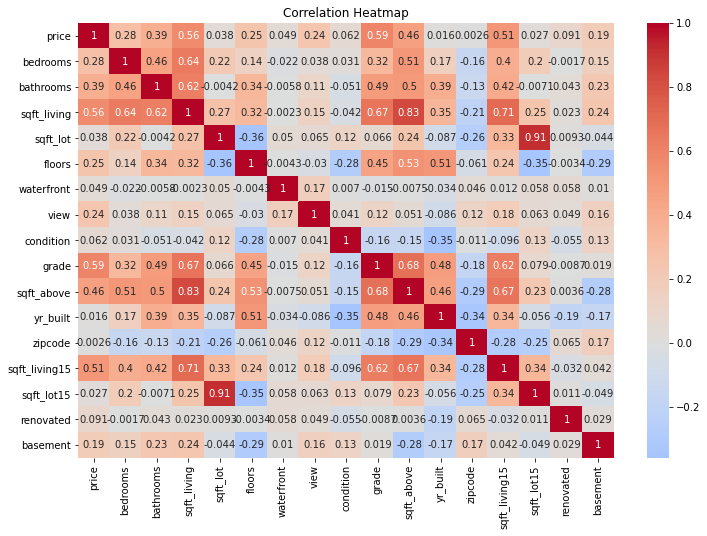

In [2218]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [2219]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.278099,0.385624,0.561192,0.038471,0.246482,0.048802,0.238946,0.061723,0.593353,0.462929,0.015622,0.002577,0.509797,0.026853,0.091077,0.188037
bedrooms,0.278099,1.000000,0.455097,0.635543,0.216207,0.144307,-0.021742,0.038315,0.031499,0.321669,0.509004,0.165814,-0.159958,0.399141,0.196207,-0.001716,0.153194
bathrooms,0.385624,0.455097,1.000000,0.622160,-0.004188,0.340552,-0.005822,0.107173,-0.050874,0.487697,0.498248,0.392487,-0.133081,0.415254,-0.007138,0.042756,0.231042
sqft_living,0.561192,0.635543,0.622160,1.000000,0.267451,0.324681,-0.002323,0.145878,-0.042334,0.669379,0.829882,0.349850,-0.211814,0.707060,0.246084,0.023079,0.235774
sqft_lot,0.038471,0.216207,-0.004188,0.267451,1.000000,-0.359091,0.050154,0.065152,0.122203,0.065662,0.243020,-0.086880,-0.258164,0.326703,0.909856,0.009262,-0.043635
floors,0.246482,0.144307,0.340552,0.324681,-0.359091,1.000000,-0.004291,-0.030226,-0.275390,0.451208,0.532836,0.508972,-0.061332,0.238216,-0.346081,-0.003421,-0.285677
waterfront,0.048802,-0.021742,-0.005822,-0.002323,0.050154,-0.004291,1.000000,0.167663,0.007011,-0.015500,-0.007541,-0.034443,0.045668,0.011602,0.057686,0.058100,0.009955
view,0.238946,0.038315,0.107173,0.145878,0.065152,-0.030226,0.167663,1.000000,0.040543,0.120534,0.051183,-0.085652,0.122548,0.183210,0.063300,0.048959,0.163350
condition,0.061723,0.031499,-0.050874,-0.042334,0.122203,-0.275390,0.007011,0.040543,1.000000,-0.162162,-0.152611,-0.351031,-0.010897,-0.095948,0.127833,-0.054688,0.127981
grade,0.593353,0.321669,0.487697,0.669379,0.065662,0.451208,-0.015500,0.120534,-0.162162,1.000000,0.677362,0.484500,-0.177750,0.624838,0.079297,-0.008684,0.019003


In [2220]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [2221]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [2222]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.909856
"(sqft_above, sqft_living)",0.829882


In [2223]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [2224]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'renovated', 'basement'],
      dtype='object')

In [2225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        18948 non-null  float64
 1   bedrooms     18948 non-null  int64  
 2   bathrooms    18948 non-null  int64  
 3   sqft_living  18948 non-null  float64
 4   sqft_lot     18948 non-null  float64
 5   floors       18948 non-null  float64
 6   waterfront   18948 non-null  int64  
 7   view         18948 non-null  int64  
 8   condition    18948 non-null  int64  
 9   grade        18948 non-null  int64  
 10  yr_built     18948 non-null  int64  
 11  zipcode      18948 non-null  int64  
 12  renovated    18948 non-null  int64  
 13  basement     18948 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.8 MB


## Save Results

In [2226]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [2227]:
categorical_feats = ['basement', 'bathrooms', 'bedrooms', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode', 'floors']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [2228]:
df = pd.get_dummies(df, drop_first = True)

In [2229]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [2230]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [2231]:
df.columns = [col_formatting(col) for col in df.columns]

In [2232]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',


In [2233]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [2234]:
train, test = train_test_split(df)

In [2235]:
print(len(train), len(test))
train.head()

14211 4737


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15460,225900.0,-0.438543,0.295683,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6041,510000.0,-0.814018,-0.768532,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20532,460000.0,0.774919,2.570750,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8339,325000.0,-0.814018,-1.157728,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8721,380000.0,0.495259,2.257535,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2236]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
4233,445000.0,-1.398670,-0.299043,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8434,245000.0,-0.403771,0.714312,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1203,525000.0,-0.318791,0.044740,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19822,379900.0,0.025710,-1.254296,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6463,260000.0,-0.156614,0.284130,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [2237]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     329.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:09   Log-Likelihood:            -1.8077e+05
No. Observations:               14211   AIC:                         3.620e+05
Df Residuals:                   13994   BIC:                         3.636e+05
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.119e+05   6.28e+04      4.965      0.000    1.89e+05    4.35e+05
sqft_living    7.214e+04   1484.967     48.582      0.000    6.92e+04    7.51e+04
sqft_lot       2.497e+04   1186.276     21.049      0.000    2.26e+04    2.73e+04
bedrooms_2    -1.488e+04   7543.565     -1.972      0.049   -2.97e+04     -91.447
bedrooms_3    -1.473e+04   7642.580     -1.927      0.054   -2.97e+04     252.597
bedrooms_4    -1.457e+04   7883.182     -1.849      0.065      -3e+04     878.057
bedrooms_5    -2.438e+04   8411.174     -2.898      0.004   -4.09e+04   -7888.751
bedrooms_6    -2.536e+04   1.06e+04     -2.382      0.017   -4.62e+04   -4492.768
bathrooms_1    2.323e+04   5.83e+04      0.399      0.690    -9.1e+04    1.37e+05
bathrooms_2    1.957e+04   5.83e+04      0.336      0.737   -9.47e+04    1.34e+05
bathrooms_3    3.899e+04   5.84e+04      0.668      0.504   -7.54e+04    1.53e+05
bathrooms_4     5.54e+04   5.85e+04      0.947      0.344   -5.93e+04     1.7e+05
floors_1_5    -2427.6262   2983.137     -0.814      0.416   -8274.973    3419.721
floors_2_0    -2395.8077   2548.159     -0.940      0.347   -7390.540    2598.925
floors_2_5    -1.311e+04      1e+04     -1.310      0.190   -3.27e+04    6506.608
floors_3_0    -3.895e+04   5527.759     -7.047      0.000   -4.98e+04   -2.81e+04
floors_3_5    -5.964e+04   3.68e+04     -1.619      0.105   -1.32e+05    1.26e+04
waterfront_1    2.06e+05   1.56e+04     13.241      0.000    1.75e+05    2.36e+05
view_1         8.289e+04   2919.085     28.396      0.000    7.72e+04    8.86e+04
condition_2    9.095e+04   2.05e+04      4.445      0.000    5.08e+04    1.31e+05
condition_3    1.292e+05   1.91e+04      6.779      0.000    9.18e+04    1.67e+05
condition_4    1.483e+05   1.91e+04      7.782      0.000    1.11e+05    1.86e+05
condition_5    1.813e+05   1.92e+04      9.452      0.000    1.44e+05    2.19e+05
grade_11        9.15e+04   1.52e+04      6.033      0.000    6.18e+04    1.21e+05
grade_3       -2.392e+04   8.31e+04     -0.288      0.773   -1.87e+05    1.39e+05
grade_4       -1.617e+05   1.88e+04     -8.613      0.000   -1.99e+05   -1.25e+05
grade_5       -2.035e+05   8852.328    -22.989      0.000   -2.21e+05   -1.86e+05
grade_6       -2.039e+05   5975.195    -34.131      0.000   -2.16e+05   -1.92e+05
grade_7       -1.804e+05   5106.036    -35.323      0.000    -1.9e+05    -1.7e+05
grade_8       -1.347e+05   4771.102    -28.232      0.000   -1.44e+05   -1.25e+05
grade_9        -5.86e+04   4827.658    -12.138      0.000   -6.81e+04   -4.91e+04
yr_built_1901 -6.795e+04   2.03e+04     -3.339      0.001   -1.08e+05   -2.81e+04
yr_built_1902 -8568.6932   2.18e+04     -0.393      0.694   -5.13e+04    3.42e+04
yr_built_1903 -5.463e+04   1.77e+04     -3.082      0.002   -8.94e+04   -1.99e+04
yr_built_1904  3770.2684   1.84e+04      0.204   

## Remove the Uninfluential Features

In [2238]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

217 141
['sqft_living', 'sqft_lot', 'bedrooms_2', 'bedrooms_5', 'bedrooms_6']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.119e+05,6.28e+04,4.965,0.000,1.89e+05,4.35e+05
sqft_living,7.214e+04,1484.967,48.582,0.000,6.92e+04,7.51e+04
sqft_lot,2.497e+04,1186.276,21.049,0.000,2.26e+04,2.73e+04
bedrooms_2,-1.488e+04,7543.565,-1.972,0.049,-2.97e+04,-91.447
bedrooms_3,-1.473e+04,7642.580,-1.927,0.054,-2.97e+04,252.597


In [2239]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     497.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:10   Log-Likelihood:            -1.8089e+05
No. Observations:               14211   AIC:                         3.621e+05
Df Residuals:                   14069   BIC:                         3.631e+05
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.205e+05   1.99e+04     16.146      0.000    2.82e+05    3.59e+05
sqft_living    7.289e+04   1221.421     59.680      0.000    7.05e+04    7.53e+04
sqft_lot       2.547e+04   1035.467     24.596      0.000    2.34e+04    2.75e+04
bedrooms_2     -606.7298   2390.210     -0.254      0.800   -5291.858    4078.398
bedrooms_5    -3847.4075   3046.920     -1.263      0.207   -9819.775    2124.960
bedrooms_6     -783.1657   7097.240     -0.110      0.912   -1.47e+04    1.31e+04
floors_3_0    -4.158e+04   4704.201     -8.838      0.000   -5.08e+04   -3.24e+04
waterfront_1   2.049e+05   1.56e+04     13.157      0.000    1.74e+05    2.35e+05
view_1         8.453e+04   2901.061     29.138      0.000    7.88e+04    9.02e+04
condition_2     8.19e+04   2.05e+04      3.998      0.000    4.17e+04    1.22e+05
condition_3    1.197e+05   1.91e+04      6.276      0.000    8.23e+04    1.57e+05
condition_4    1.404e+05   1.91e+04      7.358      0.000    1.03e+05    1.78e+05
condition_5    1.744e+05   1.92e+04      9.087      0.000    1.37e+05    2.12e+05
grade_11       9.283e+04   1.52e+04      6.097      0.000     6.3e+04    1.23e+05
grade_4       -1.525e+05   1.85e+04     -8.252      0.000   -1.89e+05   -1.16e+05
grade_5       -2.005e+05   8610.668    -23.291      0.000   -2.17e+05   -1.84e+05
grade_6       -2.053e+05   5770.059    -35.580      0.000   -2.17e+05   -1.94e+05
grade_7       -1.856e+05   4976.557    -37.301      0.000   -1.95e+05   -1.76e+05
grade_8       -1.405e+05   4711.116    -29.819      0.000    -1.5e+05   -1.31e+05
grade_9       -6.292e+04   4819.201    -13.056      0.000   -7.24e+04   -5.35e+04
yr_built_1901 -6.056e+04   1.73e+04     -3.496      0.000   -9.45e+04   -2.66e+04
yr_built_1903 -4.834e+04   1.41e+04     -3.431      0.001    -7.6e+04   -2.07e+04
yr_built_1908 -3.606e+04   1.06e+04     -3.413      0.001   -5.68e+04   -1.54e+04
yr_built_1914 -3.178e+04   1.38e+04     -2.302      0.021   -5.88e+04   -4717.646
yr_built_1918 -2.233e+04   9443.103     -2.365      0.018   -4.08e+04   -3821.857
yr_built_1934 -6.333e+04   2.49e+04     -2.545      0.011   -1.12e+05   -1.45e+04
yr_built_1942 -2.016e+04   6834.237     -2.950      0.003   -3.36e+04   -6764.474
yr_built_1948  -1.48e+04   6520.492     -2.269      0.023   -2.76e+04   -2014.317
yr_built_1950 -2.365e+04   6699.882     -3.530      0.000   -3.68e+04   -1.05e+04
yr_built_1951 -1.628e+04   6725.308     -2.421      0.015   -2.95e+04   -3099.325
yr_built_1953  -3.04e+04   6837.442     -4.446      0.000   -4.38e+04    -1.7e+04
yr_built_1954  -3.31e+04   5947.336     -5.565      0.000   -4.48e+04   -2.14e+04
yr_built_1955 -4.387e+04   6219.953     -7.053      0.000   -5.61e+04   -3.17e+04
yr_built_1956 -2.792e+04   7120.943     -3.921      0.000   -4.19e+04    -1.4e+04
yr_built_1957 -3.657e+04   7365.804     -4.965   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [2240]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 3.1136875939419144),
 ('sqft_lot', 2.2588317893304124),
 ('bedrooms_2', 1.6395955964861046),
 ('bedrooms_5', 1.1857706483555572),
 ('bedrooms_6', 1.05423494383385),
 ('floors_3_0', 1.361484695650754),
 ('waterfront_1', 1.1050091662977362),
 ('view_1', 1.268399952691775),
 ('condition_2', 1.459973254379576),
 ('condition_3', 36.428662999386944),
 ('condition_4', 16.402094519678354),
 ('condition_5', 5.593744088166426),
 ('grade_11', 1.099669634952662),
 ('grade_4', 1.1265967775624242),
 ('grade_5', 1.7401353774419712),
 ('grade_6', 6.77173438310771),
 ('grade_7', 21.99073200470891),
 ('grade_8', 13.025919879637348),
 ('grade_9', 4.9124130702960125),
 ('yr_built_1901', 1.0187902031188112),
 ('yr_built_1903', 1.024822763401349),
 ('yr_built_1908', 1.0265129175942007),
 ('yr_built_1914', 1.0180981898922223),
 ('yr_built_1918', 1.0351091754616275),
 ('yr_built_1934', 1.0124022846002556),
 ('yr_built_1942', 1.0873497665200524),
 ('yr_built_1948', 1.066926188890577),
 ('yr_bu

## Perform Another Round of Feature Selection

In [2241]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

141 135


In [2242]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     443.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:29   Log-Likelihood:            -1.8181e+05
No. Observations:               14211   AIC:                         3.639e+05
Df Residuals:                   14075   BIC:                         3.649e+05
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        2.8e+05   2803.530     99.860      0.000    2.74e+05    2.85e+05
sqft_living    9.377e+04   1113.171     84.233      0.000    9.16e+04    9.59e+04
sqft_lot       2.622e+04   1081.736     24.236      0.000    2.41e+04    2.83e+04
bedrooms_2     5649.5560   2532.228      2.231      0.026     686.054    1.06e+04
bedrooms_5    -1.256e+04   3239.306     -3.877      0.000   -1.89e+04   -6208.405
bedrooms_6      -1.7e+04   7556.471     -2.250      0.024   -3.18e+04   -2192.990
floors_3_0    -2.842e+04   4961.644     -5.729      0.000   -3.81e+04   -1.87e+04
waterfront_1    1.97e+05   1.66e+04     11.874      0.000    1.65e+05     2.3e+05
view_1         9.397e+04   3081.193     30.499      0.000    8.79e+04       1e+05
condition_2    -5.19e+04   8325.886     -6.234      0.000   -6.82e+04   -3.56e+04
grade_11       1.951e+05   1.58e+04     12.356      0.000    1.64e+05    2.26e+05
grade_4        6.471e+04   1.87e+04      3.466      0.001    2.81e+04    1.01e+05
grade_5        6088.0078   7108.744      0.856      0.392   -7846.072       2e+04
grade_9        6.665e+04   2694.390     24.736      0.000    6.14e+04    7.19e+04
yr_built_1901 -7.309e+04   1.85e+04     -3.961      0.000   -1.09e+05   -3.69e+04
yr_built_1903 -5.247e+04    1.5e+04     -3.492      0.000   -8.19e+04    -2.3e+04
yr_built_1908 -3.899e+04   1.13e+04     -3.465      0.001    -6.1e+04   -1.69e+04
yr_built_1914 -3.782e+04   1.47e+04     -2.571      0.010   -6.66e+04   -8990.673
yr_built_1918 -2.806e+04   1.01e+04     -2.792      0.005   -4.78e+04   -8362.323
yr_built_1934 -6.689e+04   2.65e+04     -2.520      0.012   -1.19e+05   -1.49e+04
yr_built_1942 -2.189e+04   7267.427     -3.011      0.003   -3.61e+04   -7640.699
yr_built_1948 -1.784e+04   6950.998     -2.566      0.010   -3.15e+04   -4210.624
yr_built_1950 -2.847e+04   7142.000     -3.986      0.000   -4.25e+04   -1.45e+04
yr_built_1951 -1.631e+04   7171.264     -2.275      0.023   -3.04e+04   -2257.863
yr_built_1953 -2.887e+04   7283.167     -3.964      0.000   -4.31e+04   -1.46e+04
yr_built_1954 -3.296e+04   6332.903     -5.204      0.000   -4.54e+04   -2.05e+04
yr_built_1955 -4.704e+04   6608.334     -7.119      0.000      -6e+04   -3.41e+04
yr_built_1956 -3.064e+04   7576.015     -4.045      0.000   -4.55e+04   -1.58e+04
yr_built_1957 -3.878e+04   7842.597     -4.945      0.000   -5.42e+04   -2.34e+04
yr_built_1958 -2.848e+04   7390.849     -3.853      0.000    -4.3e+04    -1.4e+04
yr_built_1959 -4.096e+04   6079.486     -6.737      0.000   -5.29e+04    -2.9e+04
yr_built_1960  -3.07e+04   7033.395     -4.364      0.000   -4.45e+04   -1.69e+04
yr_built_1961  -3.71e+04   7195.025     -5.156      0.000   -5.12e+04    -2.3e+04
yr_built_1962 -4.096e+04   6269.046     -6.534      0.000   -5.33e+04   -2.87e+04
yr_built_1963 -3.069e+04   7029.247     -4.366   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [2243]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

136 127
['sqft_living', 'sqft_lot', 'bedrooms_2', 'bedrooms_5', 'bedrooms_6']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.8e+05,2803.530,99.860,0.000,2.74e+05,2.85e+05
sqft_living,9.377e+04,1113.171,84.233,0.000,9.16e+04,9.59e+04
sqft_lot,2.622e+04,1081.736,24.236,0.000,2.41e+04,2.83e+04
bedrooms_2,5649.5560,2532.228,2.231,0.026,686.054,1.06e+04
bedrooms_5,-1.256e+04,3239.306,-3.877,0.000,-1.89e+04,-6208.405


In [2244]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     471.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:30   Log-Likelihood:            -1.8181e+05
No. Observations:               14211   AIC:                         3.639e+05
Df Residuals:                   14083   BIC:                         3.648e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.778e+05   2652.146    104.748      0.000    2.73e+05    2.83e+05
sqft_living    9.358e+04   1085.414     86.217      0.000    9.15e+04    9.57e+04
sqft_lot       2.608e+04   1065.805     24.473      0.000     2.4e+04    2.82e+04
bedrooms_2     6060.7876   2523.480      2.402      0.016    1114.432     1.1e+04
bedrooms_5    -1.229e+04   3234.257     -3.801      0.000   -1.86e+04   -5952.585
bedrooms_6    -1.672e+04   7548.708     -2.214      0.027   -3.15e+04   -1919.686
floors_3_0      -2.9e+04   4954.858     -5.852      0.000   -3.87e+04   -1.93e+04
waterfront_1   1.976e+05   1.66e+04     11.913      0.000    1.65e+05     2.3e+05
view_1           9.4e+04   3080.085     30.517      0.000     8.8e+04       1e+05
condition_2   -5.106e+04   8312.621     -6.142      0.000   -6.74e+04   -3.48e+04
grade_11       1.947e+05   1.58e+04     12.342      0.000    1.64e+05    2.26e+05
grade_4        6.526e+04   1.86e+04      3.500      0.000    2.87e+04    1.02e+05
grade_9        6.678e+04   2688.146     24.843      0.000    6.15e+04    7.21e+04
yr_built_1901 -7.216e+04   1.85e+04     -3.911      0.000   -1.08e+05    -3.6e+04
yr_built_1903 -5.133e+04    1.5e+04     -3.418      0.001   -8.08e+04   -2.19e+04
yr_built_1908 -3.787e+04   1.12e+04     -3.369      0.001   -5.99e+04   -1.58e+04
yr_built_1914   -3.7e+04   1.47e+04     -2.516      0.012   -6.58e+04   -8178.355
yr_built_1918  -2.71e+04      1e+04     -2.698      0.007   -4.68e+04   -7407.370
yr_built_1934 -6.617e+04   2.65e+04     -2.493      0.013   -1.18e+05   -1.41e+04
yr_built_1942 -2.069e+04   7253.940     -2.853      0.004   -3.49e+04   -6474.740
yr_built_1948 -1.676e+04   6938.768     -2.415      0.016   -3.04e+04   -3158.144
yr_built_1950 -2.737e+04   7129.749     -3.839      0.000   -4.13e+04   -1.34e+04
yr_built_1951 -1.542e+04   7159.586     -2.154      0.031   -2.95e+04   -1389.971
yr_built_1953 -2.766e+04   7268.320     -3.805      0.000   -4.19e+04   -1.34e+04
yr_built_1954 -3.166e+04   6309.855     -5.017      0.000    -4.4e+04   -1.93e+04
yr_built_1955 -4.566e+04   6576.452     -6.943      0.000   -5.86e+04   -3.28e+04
yr_built_1956 -2.927e+04   7551.484     -3.877      0.000   -4.41e+04   -1.45e+04
yr_built_1957 -3.739e+04   7814.333     -4.784      0.000   -5.27e+04   -2.21e+04
yr_built_1958 -2.694e+04   7353.310     -3.664      0.000   -4.14e+04   -1.25e+04
yr_built_1959 -3.942e+04   6037.028     -6.530      0.000   -5.13e+04   -2.76e+04
yr_built_1960 -2.909e+04   6993.204     -4.159      0.000   -4.28e+04   -1.54e+04
yr_built_1961 -3.539e+04   7155.352     -4.947      0.000   -4.94e+04   -2.14e+04
yr_built_1962 -3.926e+04   6218.577     -6.314      0.000   -5.15e+04   -2.71e+04
yr_built_1963 -2.887e+04   6984.011     -4.133      0.000   -4.26e+04   -1.52e+04
yr_built_1964 -3.196e+04   8547.029     -3.739   

# Check the Normality Assumption

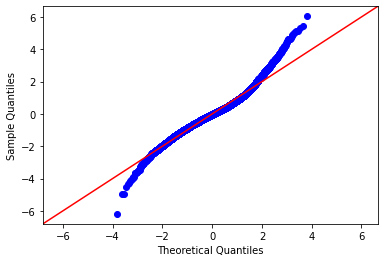

In [2245]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

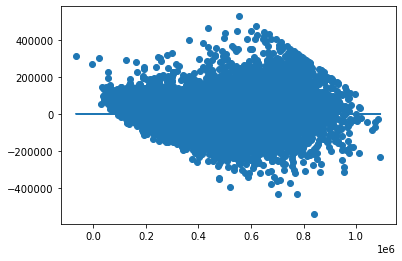

In [2246]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [2247]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([87639.95031358, 88403.66034659, 89890.75838551, 87523.86480139,
       85426.24515829, 86196.57115863, 86434.58760568, 93206.60439254,
       88761.85657292, 86119.82261446])

87960.39213495766

2182.4268348947608

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

In [2248]:
X_train.head()

,sqft_living,sqft_lot,bedrooms_2,bedrooms_5,bedrooms_6,floors_3_0,waterfront_1,view_1,condition_2,grade_11,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15460,-0.438543,0.295683,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6041,-0.814018,-0.768532,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20532,0.774919,2.570750,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8339,-0.814018,-1.157728,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8721,0.495259,2.257535,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Save model using pickle

# Model 2: Remove yr_built and zip code

In [2249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Columns: 217 entries, price to basement_1
dtypes: float64(3), uint8(214)
memory usage: 5.1 MB


In [2250]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2251]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',


In [2252]:
model_2_df = df[['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
'renovated_1',
 'basement_1']]

In [2253]:
model_2_df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [2254]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [2255]:
#train, test = train_test_split(model_2_df)

In [2256]:
print(len(train), len(test))
train.head()

14211 4737


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15460,225900.0,-0.438543,0.295683,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6041,510000.0,-0.814018,-0.768532,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20532,460000.0,0.774919,2.570750,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8339,325000.0,-0.814018,-1.157728,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8721,380000.0,0.495259,2.257535,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2257]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
4233,445000.0,-1.398670,-0.299043,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8434,245000.0,-0.403771,0.714312,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1203,525000.0,-0.318791,0.044740,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19822,379900.0,0.025710,-1.254296,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6463,260000.0,-0.156614,0.284130,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [2258]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     455.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:31   Log-Likelihood:            -1.8869e+05
No. Observations:               14211   AIC:                         3.775e+05
Df Residuals:                   14179   BIC:                         3.777e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.607e+05   1.06e+05      6.243      0.000    4.53e+05    8.68e+05
sqft_living   7.186e+04   2410.626     29.811      0.000    6.71e+04    7.66e+04
sqft_lot     -1.972e+04   1569.401    -12.562      0.000   -2.28e+04   -1.66e+04
bedrooms_2    2868.4568   9323.877      0.308      0.758   -1.54e+04    2.11e+04
bedrooms_3   -4.255e+04   8906.082     -4.777      0.000      -6e+04   -2.51e+04
bedrooms_4   -4.752e+04   9089.107     -5.228      0.000   -6.53e+04   -2.97e+04
bedrooms_5   -4.779e+04   1.01e+04     -4.723      0.000   -6.76e+04    -2.8e+04
bathrooms_1   7.223e+04      1e+05      0.720      0.471   -1.24e+05    2.69e+05
bathrooms_2   4.157e+04      1e+05      0.414      0.679   -1.55e+05    2.38e+05
bathrooms_3   5.806e+04      1e+05      0.578      0.563   -1.39e+05    2.55e+05
bathrooms_4   8.107e+04   1.01e+05      0.806      0.420   -1.16e+05    2.78e+05
floors_1_5      7.1e+04   4527.559     15.683      0.000    6.21e+04    7.99e+04
floors_2_0    -1.76e+04   3813.372     -4.615      0.000   -2.51e+04   -1.01e+04
floors_2_5    2.265e+04    1.7e+04      1.333      0.182   -1.07e+04    5.59e+04
floors_3_0    1.068e+04   8578.266      1.245      0.213   -6132.602    2.75e+04
floors_3_5   -1.737e+04   6.36e+04     -0.273      0.785   -1.42e+05    1.07e+05
waterfront_1   1.11e+05    2.6e+04      4.270      0.000    6.01e+04    1.62e+05
view_1        8.414e+04   4844.119     17.369      0.000    7.46e+04    9.36e+04
condition_2   -1.05e+04   3.51e+04     -0.299      0.765   -7.93e+04    5.83e+04
condition_3   9779.3633   3.27e+04      0.299      0.765   -5.43e+04    7.39e+04
condition_4   4.898e+04   3.27e+04      1.497      0.134   -1.51e+04    1.13e+05
condition_5   9.597e+04   3.29e+04      2.916      0.004    3.15e+04     1.6e+05
grade_11      9.922e+04   2.61e+04      3.806      0.000    4.81e+04     1.5e+05
grade_3      -3.168e+05   1.42e+05     -2.225      0.026   -5.96e+05   -3.77e+04
grade_4      -3.625e+05   3.16e+04    -11.464      0.000   -4.24e+05   -3.01e+05
grade_5      -3.923e+05   1.44e+04    -27.160      0.000   -4.21e+05   -3.64e+05
grade_6       -3.69e+05   9555.204    -38.622      0.000   -3.88e+05    -3.5e+05
grade_7       -3.07e+05   8297.075    -36.998      0.000   -3.23e+05   -2.91e+05
grade_8      -2.185e+05   7930.154    -27.549      0.000   -2.34e+05   -2.03e+05
grade_9       -9.14e+04   8183.832    -11.168      0.000   -1.07e+05   -7.54e+04
renovated_1    9.22e+04   7016.586     13.141      0.000    7.85e+04    1.06e+05
basement_1    2.954e+04   3080.663      9.588      0.000    2.35e+04    3.56e+04
==============================================================================
Omnibus:                      721.536   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.295
Skew:      

## Perform stepwise selection

In [2259]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         18948 non-null  float64
 1   sqft_living   18948 non-null  float64
 2   sqft_lot      18948 non-null  float64
 3   bedrooms_2    18948 non-null  uint8  
 4   bedrooms_3    18948 non-null  uint8  
 5   bedrooms_4    18948 non-null  uint8  
 6   bedrooms_5    18948 non-null  uint8  
 7   bathrooms_1   18948 non-null  uint8  
 8   bathrooms_2   18948 non-null  uint8  
 9   bathrooms_3   18948 non-null  uint8  
 10  bathrooms_4   18948 non-null  uint8  
 11  floors_1_5    18948 non-null  uint8  
 12  floors_2_0    18948 non-null  uint8  
 13  floors_2_5    18948 non-null  uint8  
 14  floors_3_0    18948 non-null  uint8  
 15  floors_3_5    18948 non-null  uint8  
 16  waterfront_1  18948 non-null  uint8  
 17  view_1        18948 non-null  uint8  
 18  condition_2   18948 non-nu

In [2260]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
'''

'\ndef stepwise_selection(X, y, \n                       initial_list=[], \n                       threshold_in=0.01, \n                       threshold_out = 0.05, \n                       verbose=True):\n    """ Perform a forward`-backward feature selection \n    based on p-value from statsmodels.api.OLS\n    Arguments:\n        X - pandas.DataFrame with candidate features\n        y - list-like with the target\n        initial_list - list of features to start with (column names of X)\n        threshold_in - include a feature if its p-value < threshold_in\n        threshold_out - exclude a feature if its p-value > threshold_out\n        verbose - whether to print the sequence of inclusions and exclusions\n    Returns: list of selected features \n    Always set threshold_in < threshold_out to avoid infinite looping.\n    See https://en.wikipedia.org/wiki/Stepwise_regression for the details\n    """\n    included = list(initial_list)\n    while True:\n        changed=False\n        # f

In [2261]:
'''
X = model_2_df.drop('price', axis=1)
y = model_2_df['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)
'''

"\nX = model_2_df.drop('price', axis=1)\ny = model_2_df['price']\n\nresult = stepwise_selection(X, y, verbose = True)\nprint('resulting features:')\nprint(result)\n"

In [2262]:
'''
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()
'''

'\nX_fin = X[result]\nX_with_intercept = sm.add_constant(X_fin)\nmodel = sm.OLS(y,X_with_intercept).fit()\nmodel.summary()\n'

Note much of a difference in Adj. R-squared.

21 features, underfitting due to low Adj. R-squared.

# Model 3: Remove yr_built 

In [2263]:
model_3_df = df[['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199',
 'renovated_1',
 'basement_1']]

In [2264]:
model_3_df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.090208,-0.302383,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.966809,0.032680,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.218301,0.468225,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.250752,-0.467345,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.156614,0.180469,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2265]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [2266]:
print(len(train), len(test))
train.head()

14211 4737


/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15460,225900.0,-0.438543,0.295683,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6041,510000.0,-0.814018,-0.768532,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20532,460000.0,0.774919,2.570750,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8339,325000.0,-0.814018,-1.157728,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8721,380000.0,0.495259,2.257535,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2267]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
4233,445000.0,-1.398670,-0.299043,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8434,245000.0,-0.403771,0.714312,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1203,525000.0,-0.318791,0.044740,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19822,379900.0,0.025710,-1.254296,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6463,260000.0,-0.156614,0.284130,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [2268]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     682.0
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:32   Log-Likelihood:            -1.8107e+05
No. Observations:               14211   AIC:                         3.623e+05
Df Residuals:                   14110   BIC:                         3.631e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.961e+05   6.24e+04      4.745      0.000    1.74e+05    4.18e+05
sqft_living      7.4e+04   1440.764     51.365      0.000    7.12e+04    7.68e+04
sqft_lot       2.036e+04   1068.364     19.054      0.000    1.83e+04    2.25e+04
bedrooms_2     2341.2476   5491.682      0.426      0.670   -8423.175    1.31e+04
bedrooms_3    -1695.0202   5247.791     -0.323      0.747    -1.2e+04    8591.344
bedrooms_4    -1145.0580   5355.497     -0.214      0.831   -1.16e+04    9352.423
bedrooms_5    -1.065e+04   5954.665     -1.789      0.074   -2.23e+04    1018.097
bathrooms_1    3244.4911   5.89e+04      0.055      0.956   -1.12e+05    1.19e+05
bathrooms_2   -3822.0562   5.89e+04     -0.065      0.948   -1.19e+05    1.12e+05
bathrooms_3    1.813e+04   5.89e+04      0.308      0.758   -9.74e+04    1.34e+05
bathrooms_4    3.697e+04   5.91e+04      0.626      0.531   -7.88e+04    1.53e+05
floors_1_5     9427.1186   2783.811      3.386      0.001    3970.481    1.49e+04
floors_2_0     5359.9006   2304.269      2.326      0.020     843.230    9876.572
floors_2_5    -5168.8133   1.01e+04     -0.514      0.607   -2.49e+04    1.46e+04
floors_3_0    -3.669e+04   5228.508     -7.017      0.000   -4.69e+04   -2.64e+04
floors_3_5    -7.652e+04   3.74e+04     -2.048      0.041    -1.5e+05   -3280.586
waterfront_1   2.085e+05   1.57e+04     13.256      0.000    1.78e+05    2.39e+05
view_1         8.193e+04   2935.792     27.908      0.000    7.62e+04    8.77e+04
condition_2    8.603e+04   2.07e+04      4.164      0.000    4.55e+04    1.27e+05
condition_3    1.237e+05   1.92e+04      6.425      0.000    8.59e+04    1.61e+05
condition_4    1.413e+05   1.93e+04      7.338      0.000    1.04e+05    1.79e+05
condition_5    1.755e+05   1.94e+04      9.061      0.000    1.38e+05    2.13e+05
grade_11       8.997e+04   1.54e+04      5.855      0.000    5.99e+04     1.2e+05
grade_3        1.231e+04   8.38e+04      0.147      0.883   -1.52e+05    1.77e+05
grade_4       -1.396e+05   1.87e+04     -7.457      0.000   -1.76e+05   -1.03e+05
grade_5       -1.896e+05   8720.671    -21.737      0.000   -2.07e+05   -1.72e+05
grade_6       -1.978e+05   5854.959    -33.776      0.000   -2.09e+05   -1.86e+05
grade_7       -1.814e+05   5061.615    -35.842      0.000   -1.91e+05   -1.71e+05
grade_8        -1.35e+05   4773.608    -28.273      0.000   -1.44e+05   -1.26e+05
grade_9       -5.501e+04   4864.534    -11.309      0.000   -6.45e+04   -4.55e+04
zipcode_98002  9907.7044   8553.509      1.158      0.247   -6858.304    2.67e+04
zipcode_98003  1.132e+04   7814.272      1.448      0.148   -3999.070    2.66e+04
zipcode_98004  5.375e+05   9373.048     57.350      0.000    5.19e+05    5.56e+05
zipcode_98005  3.572e+05   9998.177     35.722      0.000    3.38e+05    3.77e+05
zipcode_98006  2.895e+05   7147.137     40.505   

## Remove Uninfluential features part 2

In [2269]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

101 83
['sqft_living', 'sqft_lot', 'floors_1_5', 'floors_2_0', 'floors_3_0']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.961e+05,6.24e+04,4.745,0.000,1.74e+05,4.18e+05
sqft_living,7.4e+04,1440.764,51.365,0.000,7.12e+04,7.68e+04
sqft_lot,2.036e+04,1068.364,19.054,0.000,1.83e+04,2.25e+04
bedrooms_2,2341.2476,5491.682,0.426,0.670,-8423.175,1.31e+04
bedrooms_3,-1695.0202,5247.791,-0.323,0.747,-1.2e+04,8591.344


In [2270]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     810.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:32   Log-Likelihood:            -1.8116e+05
No. Observations:               14211   AIC:                         3.625e+05
Df Residuals:                   14127   BIC:                         3.631e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept          3e+05   2.01e+04     14.912      0.000    2.61e+05    3.39e+05
sqft_living    7.412e+04   1208.133     61.347      0.000    7.17e+04    7.65e+04
sqft_lot       2.011e+04   1053.572     19.089      0.000     1.8e+04    2.22e+04
floors_1_5     9521.8611   2764.333      3.445      0.001    4103.404    1.49e+04
floors_2_0     7077.3699   2251.172      3.144      0.002    2664.776    1.15e+04
floors_3_0    -3.537e+04   5147.871     -6.870      0.000   -4.55e+04   -2.53e+04
floors_3_5     -6.71e+04   3.75e+04     -1.788      0.074   -1.41e+05    6471.266
waterfront_1   2.079e+05   1.58e+04     13.152      0.000    1.77e+05    2.39e+05
view_1         8.373e+04   2937.851     28.500      0.000     7.8e+04    8.95e+04
condition_2    8.662e+04   2.08e+04      4.170      0.000    4.59e+04    1.27e+05
condition_3    1.241e+05   1.94e+04      6.414      0.000    8.62e+04    1.62e+05
condition_4    1.414e+05   1.94e+04      7.304      0.000    1.03e+05    1.79e+05
condition_5    1.759e+05   1.95e+04      9.037      0.000    1.38e+05    2.14e+05
grade_11       9.274e+04   1.54e+04      6.005      0.000    6.25e+04    1.23e+05
grade_4         -1.4e+05   1.86e+04     -7.511      0.000   -1.77e+05   -1.03e+05
grade_5       -1.916e+05   8644.898    -22.160      0.000   -2.09e+05   -1.75e+05
grade_6       -2.016e+05   5801.081    -34.753      0.000   -2.13e+05    -1.9e+05
grade_7        -1.89e+05   5000.298    -37.804      0.000   -1.99e+05   -1.79e+05
grade_8       -1.423e+05   4731.938    -30.064      0.000   -1.52e+05   -1.33e+05
grade_9       -5.958e+04   4860.908    -12.256      0.000   -6.91e+04      -5e+04
zipcode_98004  5.374e+05   8212.944     65.432      0.000    5.21e+05    5.53e+05
zipcode_98005  3.565e+05   8924.990     39.942      0.000    3.39e+05    3.74e+05
zipcode_98006  2.889e+05   5495.337     52.580      0.000    2.78e+05       3e+05
zipcode_98007  2.736e+05   8926.079     30.648      0.000    2.56e+05    2.91e+05
zipcode_98008  2.506e+05   6334.373     39.560      0.000    2.38e+05    2.63e+05
zipcode_98010  7.472e+04    1.2e+04      6.214      0.000    5.12e+04    9.83e+04
zipcode_98011  1.622e+05   7492.235     21.647      0.000    1.47e+05    1.77e+05
zipcode_98014   1.08e+05   1.09e+04      9.927      0.000    8.67e+04    1.29e+05
zipcode_98019  1.037e+05   7823.145     13.251      0.000    8.83e+04    1.19e+05
zipcode_98024   1.24e+05   1.52e+04      8.164      0.000    9.43e+04    1.54e+05
zipcode_98027  2.219e+05   5861.570     37.862      0.000     2.1e+05    2.33e+05
zipcode_98028  1.443e+05   6123.089     23.571      0.000    1.32e+05    1.56e+05
zipcode_98029  2.418e+05   6195.683     39.031      0.000     2.3e+05    2.54e+05
zipcode_98031  2.072e+04   6323.553      3.277      0.001    8327.758    3.31e+04
zipcode_98033  3.326e+05   5561.563     59.808   

## Evaluate Model using sci-kit learn's cross_val_score

In [2271]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([81458.53579496, 85086.82055696, 85202.04366983, 81915.32121532,
       82228.2937026 , 81782.44416313, 83352.79051524, 89491.2124992 ,
       83595.46696242, 83404.03231951])

83751.69613991697

2279.5192948466865

# Check the Normality Assumption

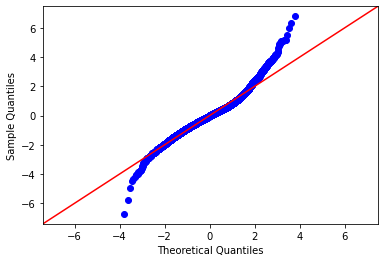

In [2272]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

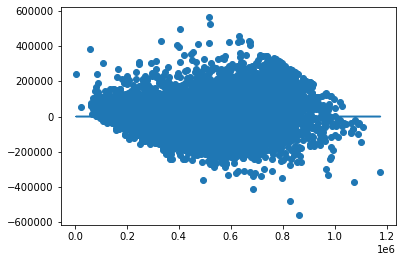

In [2273]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [2274]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 2.9648613242778312),
 ('sqft_lot', 2.2623839007123525),
 ('floors_1_5', 1.3876710154672678),
 ('floors_2_0', 3.629395279388726),
 ('floors_3_0', 1.572464840958614),
 ('floors_3_5', 1.0111315715909954),
 ('waterfront_1', 1.1028035352473535),
 ('view_1', 1.2574832731389263),
 ('condition_2', 1.450737679750599),
 ('condition_3', 35.444802627865215),
 ('condition_4', 15.604818149039215),
 ('condition_5', 5.415972183067836),
 ('grade_11', 1.0932759609783005),
 ('grade_4', 1.1146640893205457),
 ('grade_5', 1.7023087196070892),
 ('grade_6', 6.639649085691709),
 ('grade_7', 21.503524972946263),
 ('grade_8', 12.739536123941203),
 ('grade_9', 4.849278510369733),
 ('zipcode_98004', 1.0766844557358901),
 ('zipcode_98005', 1.0835512166350423),
 ('zipcode_98006', 1.2093369191737326),
 ('zipcode_98007', 1.0652814007746527),
 ('zipcode_98008', 1.1341394897069041),
 ('zipcode_98010', 1.0443552929044908),
 ('zipcode_98011', 1.09127933645676),
 ('zipcode_98014', 1.049394475714295),
 ('zi

## Perform Another Round of Feature Selection

In [2275]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

83 77


In [2276]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     748.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:39   Log-Likelihood:            -1.8206e+05
No. Observations:               14211   AIC:                         3.643e+05
Df Residuals:                   14133   BIC:                         3.649e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.606e+05   2651.566     98.300      0.000    2.55e+05    2.66e+05
sqft_living    9.138e+04   1145.632     79.766      0.000    8.91e+04    9.36e+04
sqft_lot        2.23e+04   1110.229     20.082      0.000    2.01e+04    2.45e+04
floors_1_5     6981.6906   2929.338      2.383      0.017    1239.801    1.27e+04
floors_2_0       1.6e+04   2317.437      6.904      0.000    1.15e+04    2.05e+04
floors_3_0    -1.436e+04   5352.577     -2.683      0.007   -2.49e+04   -3871.238
floors_3_5    -4.608e+04      4e+04     -1.153      0.249   -1.24e+05    3.22e+04
waterfront_1   1.974e+05   1.68e+04     11.733      0.000    1.64e+05     2.3e+05
view_1         9.351e+04   3116.212     30.008      0.000    8.74e+04    9.96e+04
condition_2    -5.04e+04   8432.309     -5.977      0.000   -6.69e+04   -3.39e+04
grade_11       2.011e+05    1.6e+04     12.591      0.000     1.7e+05    2.32e+05
grade_4        7.144e+04   1.89e+04      3.786      0.000    3.45e+04    1.08e+05
grade_5        1.354e+04   7148.750      1.894      0.058    -472.779    2.76e+04
grade_9        7.295e+04   2712.234     26.896      0.000    6.76e+04    7.83e+04
zipcode_98004  5.488e+05   8741.262     62.781      0.000    5.32e+05    5.66e+05
zipcode_98005  3.766e+05   9481.523     39.723      0.000    3.58e+05    3.95e+05
zipcode_98006  3.167e+05   5801.574     54.582      0.000    3.05e+05    3.28e+05
zipcode_98007  2.934e+05   9486.080     30.932      0.000    2.75e+05    3.12e+05
zipcode_98008   2.56e+05   6741.210     37.973      0.000    2.43e+05    2.69e+05
zipcode_98010  7.194e+04   1.28e+04      5.620      0.000    4.68e+04     9.7e+04
zipcode_98011  1.604e+05   7976.165     20.112      0.000    1.45e+05    1.76e+05
zipcode_98014  1.003e+05   1.16e+04      8.656      0.000    7.76e+04    1.23e+05
zipcode_98019  9.111e+04   8317.566     10.954      0.000    7.48e+04    1.07e+05
zipcode_98024  1.185e+05   1.62e+04      7.327      0.000    8.68e+04     1.5e+05
zipcode_98027  2.397e+05   6225.460     38.501      0.000    2.27e+05    2.52e+05
zipcode_98028  1.415e+05   6517.348     21.704      0.000    1.29e+05    1.54e+05
zipcode_98029  2.547e+05   6579.010     38.707      0.000    2.42e+05    2.68e+05
zipcode_98031  1.686e+04   6729.327      2.505      0.012    3667.047       3e+04
zipcode_98033  3.427e+05   5916.775     57.924      0.000    3.31e+05    3.54e+05
zipcode_98034  1.978e+05   5108.688     38.718      0.000    1.88e+05    2.08e+05
zipcode_98038  3.805e+04   5092.360      7.472      0.000    2.81e+04     4.8e+04
zipcode_98039  6.809e+05   3.64e+04     18.731      0.000     6.1e+05    7.52e+05
zipcode_98040   4.81e+05   8688.900     55.354      0.000    4.64e+05    4.98e+05
zipcode_98042   1.71e+04   5083.650      3.363      0.001    7130.692    2.71e+04
zipcode_98045  9.519e+04   7744.778     12.291   

In [2277]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([89163.54600028, 89926.39157717, 90801.19528108, 88301.66916988,
       86489.46988823, 87508.24764285, 87164.71126612, 95032.40784995,
       90085.50551935, 86887.39402927])

89136.05382241747

2415.7722279526415

In [2278]:
# Save model
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [2279]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
4233,445000.0,-1.398670,-0.299043,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8434,245000.0,-0.403771,0.714312,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1203,525000.0,-0.318791,0.044740,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19822,379900.0,0.025710,-1.254296,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6463,260000.0,-0.156614,0.284130,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [2280]:
len(test)

4737

In [2281]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:41:39   Log-Likelihood:                -60670.
No. Observations:                4737   AIC:                         1.215e+05
Df Residuals:                    4660   BIC:                         1.220e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.575e+05   4673.585     55.104      0.000    2.48e+05    2.67e+05
sqft_living    9.072e+04   1983.911     45.727      0.000    8.68e+04    9.46e+04
sqft_lot       1.978e+04   1968.591     10.048      0.000    1.59e+04    2.36e+04
floors_1_5     9438.4893   5094.162      1.853      0.064    -548.480    1.94e+04
floors_2_0     1.326e+04   4070.536      3.259      0.001    5284.259    2.12e+04
floors_3_0    -2.008e+04   9604.749     -2.091      0.037   -3.89e+04   -1254.267
floors_3_5     5.142e+04   8.95e+04      0.574      0.566   -1.24e+05    2.27e+05
waterfront_1   2.428e+05   2.96e+04      8.192      0.000    1.85e+05    3.01e+05
view_1         8.854e+04   5407.229     16.375      0.000    7.79e+04    9.91e+04
condition_2   -2076.4078   1.58e+04     -0.132      0.895    -3.3e+04    2.88e+04
grade_11       1.911e+05   2.62e+04      7.304      0.000     1.4e+05    2.42e+05
grade_4         8.07e+04   4.51e+04      1.788      0.074   -7760.255    1.69e+05
grade_5        1.852e+04   1.27e+04      1.457      0.145   -6391.500    4.34e+04
grade_9        8.198e+04   4710.552     17.404      0.000    7.27e+04    9.12e+04
zipcode_98004  5.294e+05   1.45e+04     36.555      0.000    5.01e+05    5.58e+05
zipcode_98005  3.609e+05   1.38e+04     26.129      0.000    3.34e+05    3.88e+05
zipcode_98006  3.207e+05      1e+04     32.003      0.000    3.01e+05     3.4e+05
zipcode_98007  2.534e+05   1.54e+04     16.460      0.000    2.23e+05    2.84e+05
zipcode_98008  2.863e+05    1.2e+04     23.948      0.000    2.63e+05     3.1e+05
zipcode_98010  8.905e+04   1.84e+04      4.843      0.000     5.3e+04    1.25e+05
zipcode_98011  1.607e+05   1.32e+04     12.149      0.000    1.35e+05    1.87e+05
zipcode_98014  7.479e+04   2.42e+04      3.092      0.002    2.74e+04    1.22e+05
zipcode_98019  9.505e+04   1.56e+04      6.089      0.000    6.44e+04    1.26e+05
zipcode_98024  1.379e+05      3e+04      4.599      0.000    7.91e+04    1.97e+05
zipcode_98027  2.218e+05   1.16e+04     19.195      0.000    1.99e+05    2.44e+05
zipcode_98028  1.492e+05   1.24e+04     12.078      0.000    1.25e+05    1.73e+05
zipcode_98029  2.577e+05   1.11e+04     23.312      0.000    2.36e+05    2.79e+05
zipcode_98031  2.792e+04   1.17e+04      2.395      0.017    5070.591    5.08e+04
zipcode_98033  3.386e+05   1.03e+04     32.745      0.000    3.18e+05    3.59e+05
zipcode_98034  1.973e+05   8712.825     22.642      0.000     1.8e+05    2.14e+05
zipcode_98038  3.703e+04   9063.943      4.085      0.000    1.93e+04    5.48e+04
zipcode_98039  2.412e-10   1.21e-10      1.998      0.046     4.5e-12    4.78e-10
zipcode_98040  4.456e+05   1.51e+04     29.572      0.000    4.16e+05    4.75e+05
zipcode_98042  1.691e+04   8657.102      1.954      0.051     -57.617    3.39e+04
zipcode_98045  9.802e+04   1.58e+04      6.198   

In [2282]:
len(x_cols)

77

In [2283]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([2.51009059e+16, 8.83327856e+04, 8.41626096e+04, 8.39557712e+04,
       8.77397826e+04, 9.42116913e+04, 8.55290248e+04, 9.58522750e+04,
       9.57391721e+04, 9.58128089e+04])

2510090585326652.0

7530271755709511.0

# THINK: LIMIT ZIP CODES, WHAT ARE MY TOP ONES?

Note: Location within King County is important with a noticeable disparity amongst zipcodes. The median house price ranges from \$235,000 in 98002 up to \$1,260,000 in 98039.